### **Visualizing Word Embeddings**

The goal of this notebook is to familiarize you with **word embeddings**—numeric representations of words that capture their meanings. Don't worry about the complicated math behind these models! The focus is on understanding **how** words can be transformed into vectors and how these vectors help us understand the relationships between words.

During week 2, we discovered that you can turn text into numbers using methods like **CountVectorizer** and **TF-IDF**. These are great for understanding which words appear often or are important in a document.

However, there’s **another way** to transform text into numbers—using **word embeddings**. Word embeddings capture the **meaning** of words, not just how often they appear.

This notebook gives you an example of how embeddings work, and shows how we can **visualize** them.

---

We use something called **word embeddings**—these are number-based representations of words that understand word meanings. Words with similar meanings have similar vectors (numbers).

Since these vectors are usually in **many dimensions** (like 300!), we use **PCA (Principal Component Analysis)** to reduce them to just **2 dimensions**—so we can **plot** them on a graph.

#### Steps in this notebook:
1. Load SpaCy’s language model.
2. Get the word vectors.
3. Use PCA to reduce the vectors to 2D.
4. Plot the words on a scatter plot.

In the final plot, words with similar meanings (like "cats" and "dogs") will be close together. Words that are different (like "professor") will be farther apart.

Just run the code to see how words are placed in 2D space based on their meaning!


### Installing the SpaCy Model

Before we can use word embeddings with SpaCy, we need to download a pre-trained language model that includes word vectors.

Run the following command to download the **`en_core_web_md`** model:

```python
!python3 -m spacy download en_core_web_md  # If you don't have the model yet, please download it
```


In [1]:
import spacy  # Importing SpaCy for Natural Language Processing
import matplotlib.pyplot as plt  # Importing matplotlib for visualization (graphs, plots)
from sklearn.decomposition import PCA  

In [3]:
# Load the pre-trained 'en_core_web_md' SpaCy model, which helps us understand word meanings and relationships
nlp = spacy.load("en_core_web_md")

# Let's pick some funny and diverse words to analyze
# Because who doesn't want to compare animals and a professor in the same space?
words = ["horses", "dogs", "cows", "cats", "professor", "teacher", "student"]

# Create vectors for each word using SpaCy's word embedding model (turns words into multi-dimensional vectors)
vectors = [nlp(word).vector for word in words]

# Print out the word vector for one word (e.g., "horses")
print(f"Vector for 'horses': {vectors[0]}")  # This will print the vector for the first word in the list


Vector for 'horses': [-7.2812e-01  4.8306e-01  2.6280e-01 -3.7774e-01 -4.0271e-02  5.1453e-01
  1.3640e-01  1.3888e-01 -5.3972e-01  2.1020e+00 -2.3324e-01  4.9793e-01
  1.8774e-01 -3.0505e-02  1.0169e-01 -4.7333e-01  3.7091e-01  6.8795e-01
  3.3333e-01 -7.9661e-02 -6.1566e-01  1.0106e+00 -1.3608e-01  2.2067e-01
 -4.1614e-01  6.4283e-02  6.3670e-02  4.8298e-01 -3.4079e-01 -3.0953e-03
 -4.0129e-01 -6.9522e-02  7.5180e-02 -3.7924e-01 -3.9827e-03  5.9433e-01
  1.3328e-01 -5.8813e-01  1.8385e-01  2.4422e-01 -2.8119e-01  1.0660e-01
  2.9286e-01  2.3929e-01 -2.0365e-03 -6.1123e-01 -3.1986e-01  5.0583e-02
  2.7396e-01  2.8713e-01 -1.6779e-01  3.3274e-01  5.2938e-02 -3.2399e-02
  5.2116e-01  2.6852e-01  2.4876e-01  3.4382e-01 -8.0725e-01  1.2061e-01
  2.1154e-01  2.1948e-01  8.6479e-01  8.0854e-01 -8.2992e-02 -2.7783e-01
  2.5970e-01 -6.6353e-01  1.7805e-01  1.3345e-01 -3.0295e-01  1.6820e-01
  4.2729e-01  4.0363e-02  2.2682e-01 -3.9931e-01  3.8106e-01  4.3683e-01
  2.1705e-01 -1.2320e+00  4.76

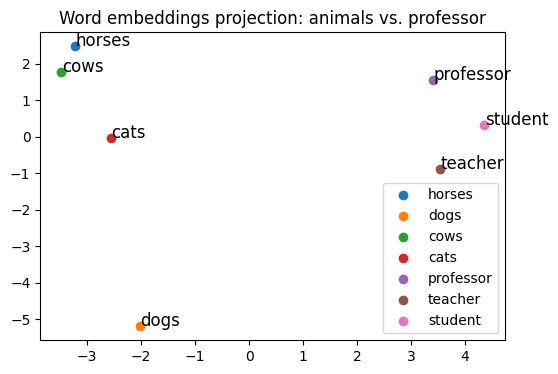

In [4]:
# Now, let's reduce the complexity of these word vectors to 2D so we can plot them
# PCA is a method that takes high-dimensional data and projects it onto a 2D space for easy visualization
pca = PCA(n_components=2)  # We're only interested in two components (2D projection)
reduced_vectors = pca.fit_transform(vectors)

# Plot the 2D representation of the words (our new "word cloud", if you will)
plt.figure(figsize=(6,4))  # Set up the figure size for the plot

# Loop through each word and its reduced vector to plot the points on a 2D plane
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word)  # Plot the word as a point
    # Add text labels next to each point for clarity (this makes it look like a fancy scatter plot)
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1], word, fontsize=12)

# Adding a title and legend to the plot for better understanding
plt.title("Word embeddings projection: animals vs. professor")
plt.legend()  # This shows which point corresponds to which word
plt.show()  # Finally, display the plot
